In [95]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [76]:
# load the train and test digits dataset into the training and testing set
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#scaling
X_train = X_train/255
X_test = X_test/255
len(X_train), len(X_test)

(60000, 10000)

In [77]:
#checking the shape of each individual data-point
X_train[0].shape

(28, 28)

In [78]:
#single datapoint 28 by 28
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

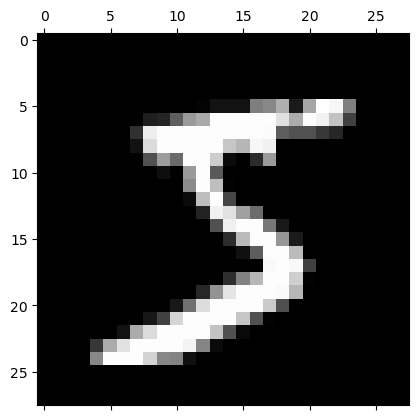

In [79]:
#plotting the first training image
plt.matshow(X_train[0])    

In [80]:
#printing the value the first image represents
y_train[0]

5

In [81]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [82]:
#reshaping the training set from 2-Dimensional to 1-Dimensional
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)
X_test_flattened.shape, X_train_flattened.shape

((10000, 784), (60000, 784))

In [98]:
#Creating a simple neural network
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
            )
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.4545
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9601 - loss: 0.1402
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0909
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0525


In [99]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9742 - loss: 0.0876


[0.07757525146007538, 0.9757000207901001]

In [100]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.5036608e-03, 5.8549318e-05, 2.4511954e-01, 9.5021784e-01,
       7.2209834e-05, 2.5431644e-02, 1.9953562e-07, 9.9999022e-01,
       6.6441238e-02, 5.3910667e-01], dtype=float32)

In [105]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

 np.argmax(y_predicted[0])

Text(120.72222222222221, 0.5, 'truth')

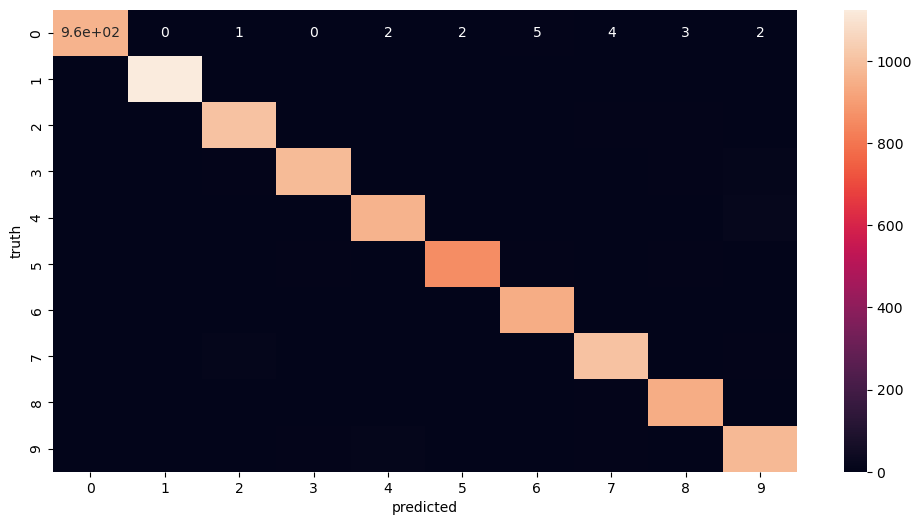

In [103]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")